# The Exploration of Latents by SimCLR model

In [2]:
%matplotlib inline

from importlib import reload
import os
import numpy as np

import pandas

import h5py
import seaborn as sns
import pandas as pd
import umap

from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from matplotlib import pyplot as plt
from tqdm import trange

In [3]:
### Load the latents file
latents_path = '/home/jovyan/ulmo/docs/modis_SimCLR/experiments/modis_latents_base'
latents_title = 'modis_latents_last.h5'
latents_file_path = os.path.join(latents_path, latents_title)
with h5py.File(latents_file_path, 'r') as file:
    print(file.keys())
    latents_last = file['modis_latents'][:]

<KeysViewHDF5 ['modis_latents']>


### Latents are 128 dimensional vectors

In [4]:
latents_last.shape

(134162, 128)

## Let's use the PCA to analyse the eigen-values of the latents matrix

## Let's do linear transformation to standarize the latent vector at first.
### For each component, we do $x_{std} = (x - \mu) / \sigma(x)$.

In [5]:
### Initialize the linear transformer at first
scaler = StandardScaler()
### Estimate the parameters
scaler.fit(latents_last)
### Transform the latents
latents_std = scaler.transform(latents_last)

In [6]:
### Let's use PCA at first to estimate the dimension of the main components. But before that, we want to standarize the latent vector
pca = PCA(n_components='mle', random_state=0)
pca.fit(latents_std)
singular_vals = pca.singular_values_

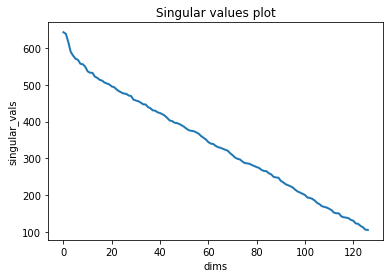

In [7]:
### plot the singular values to estimate the dimensions
plt.figure()
plt.title('Singular values plot')
plt.plot(singular_vals.squeeze(), linewidth=2)
plt.xlabel('dims')
plt.ylabel('singular_vals')
plt.show()

### From above plot, we find that all the components of the latents are essential.
### Here we use $dims = 128$.

## We will use the UMap to explore the latents. 

### Initialize the umap reducer and fit the umap model

### Create the Scatter Plot of the Reduced Latents Space by UMap

In [24]:
latents_embedding.shape

(134162, 2)

Text(0.5, 1.0, 'Scatter plot of reduced latents of modis simclr')

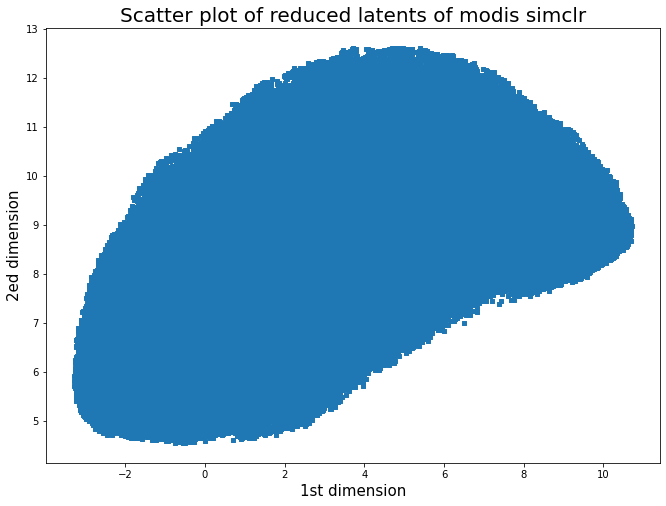

In [26]:
plt.figure(figsize=(11, 8))
plt.scatter(latents_embedding[:, 0], latents_embedding[:, 1], s=10, marker='s')
plt.xlabel('1st dimension', fontsize=15)
plt.ylabel('2ed dimension', fontsize=15)
plt.title('Scatter plot of reduced latents of modis simclr', fontsize=20)

In [8]:
%%time
reducer_umap = umap.UMAP()
latents_mapping = reducer_umap.fit(latents_std)

CPU times: user 1h 11min 24s, sys: 9min 24s, total: 1h 20min 49s
Wall time: 40min 36s


In [10]:
import umap.plot

<AxesSubplot:>

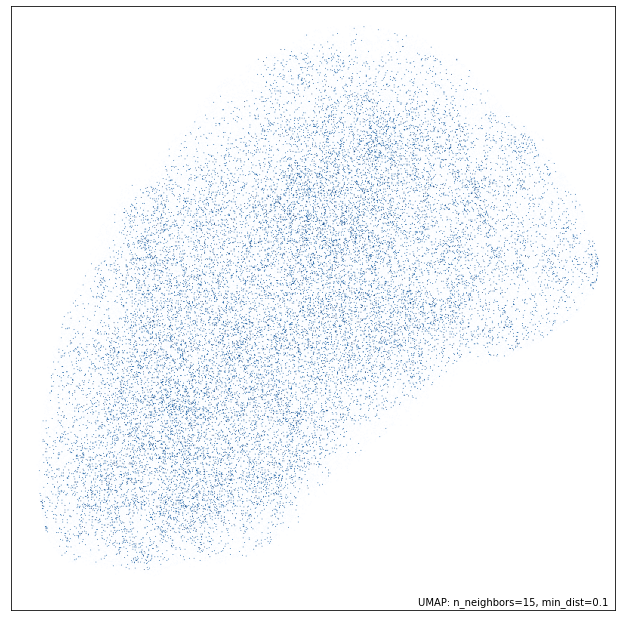

In [11]:
umap.plot.points(latents_mapping)

## 5 Epochs result

In [49]:
### Load the latents file
latents_path = '/home/jovyan/ulmo/docs/modis_SimCLR/experiments/modis_latents_base'
latents_title = 'modis_latents_ckpt_epoch_5.h5'
latents_file_path = os.path.join(latents_path, latents_title)
with h5py.File(latents_file_path, 'r') as file:
    print(file.keys())
    latents_5_epoch = file['modis_latents'][:]

<KeysViewHDF5 ['modis_latents']>


In [50]:
latents_last.shape

(134162, 128)

In [53]:
### Initialize the linear transformer at first
scaler = StandardScaler()
### Estimate the parameters
scaler.fit(latents_5_epoch)
### Transform the latents
latents_std = scaler.transform(latents_5_epoch)

In [54]:
### Let's use PCA at first to estimate the dimension of the main components. But before that, we want to standarize the latent vector
pca = PCA(n_components='mle', random_state=0)
pca.fit(latents_std)
singular_vals = pca.singular_values_

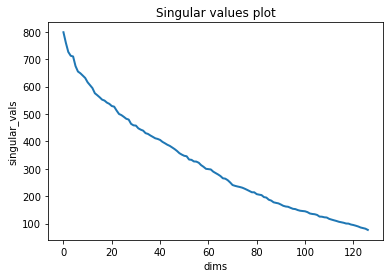

In [55]:
### plot the singular values to estimate the dimensions
plt.figure()
plt.title('Singular values plot')
plt.plot(singular_vals.squeeze(), linewidth=2)
plt.xlabel('dims')
plt.ylabel('singular_vals')
plt.show()

In [57]:
%%time
reducer_umap = umap.UMAP()
latents_mapping = reducer_umap.fit(latents_std)

CPU times: user 41min 10s, sys: 10min 3s, total: 51min 13s
Wall time: 25min 41s


In [58]:
import umap.plot

<AxesSubplot:>

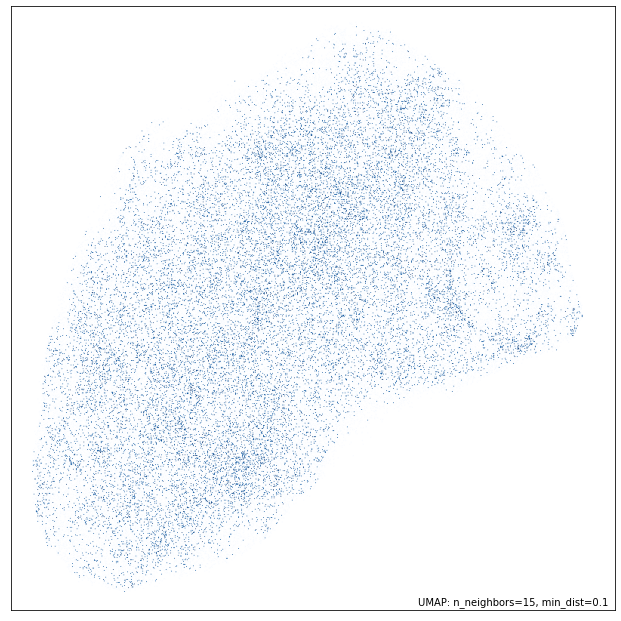

In [59]:
umap.plot.points(latents_mapping)

## 10 Epochs result

In [60]:
### Load the latents file
latents_path = '/home/jovyan/ulmo/docs/modis_SimCLR/experiments/modis_latents_base'
latents_title = 'modis_latents_ckpt_epoch_10.h5'
latents_file_path = os.path.join(latents_path, latents_title)
with h5py.File(latents_file_path, 'r') as file:
    print(file.keys())
    latents_10_epoch = file['modis_latents'][:]

<KeysViewHDF5 ['modis_latents']>


In [61]:
latents_last.shape

(134162, 128)

In [62]:
### Initialize the linear transformer at first
scaler = StandardScaler()
### Estimate the parameters
scaler.fit(latents_10_epoch)
### Transform the latents
latents_std = scaler.transform(latents_10_epoch)

In [63]:
### Let's use PCA at first to estimate the dimension of the main components. But before that, we want to standarize the latent vector
pca = PCA(n_components='mle', random_state=0)
pca.fit(latents_std)
singular_vals = pca.singular_values_

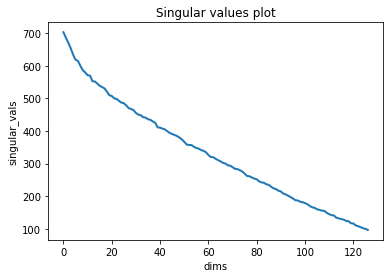

In [64]:
### plot the singular values to estimate the dimensions
plt.figure()
plt.title('Singular values plot')
plt.plot(singular_vals.squeeze(), linewidth=2)
plt.xlabel('dims')
plt.ylabel('singular_vals')
plt.show()

In [65]:
%%time
reducer_umap = umap.UMAP()
latents_mapping = reducer_umap.fit(latents_std)

CPU times: user 42min 2s, sys: 10min 1s, total: 52min 4s
Wall time: 26min 9s


<AxesSubplot:>

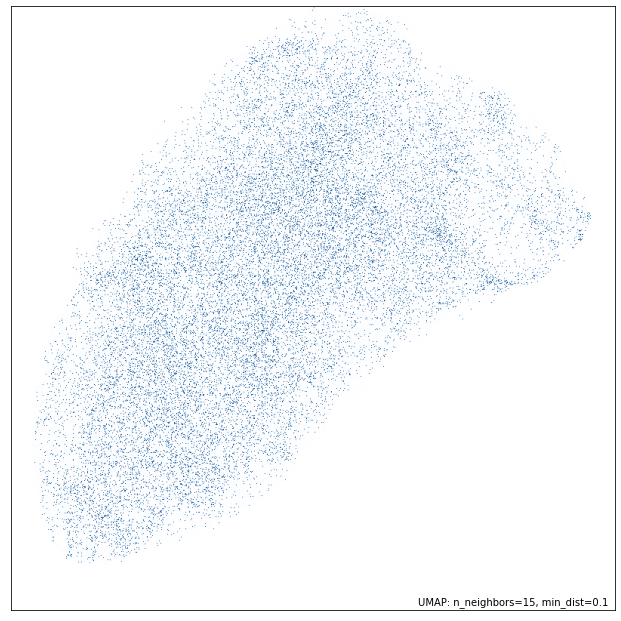

In [66]:
umap.plot.points(latents_mapping)

## 15 Epochs result

In [12]:
### Load the latents file
latents_path = '/home/jovyan/ulmo/docs/modis_SimCLR/experiments/modis_latents_base'
latents_title = 'modis_latents_ckpt_epoch_15.h5'
latents_file_path = os.path.join(latents_path, latents_title)
with h5py.File(latents_file_path, 'r') as file:
    print(file.keys())
    latents_15_epoch = file['modis_latents'][:]

<KeysViewHDF5 ['modis_latents']>


In [13]:
### Initialize the linear transformer at first
scaler = StandardScaler()
### Estimate the parameters
scaler.fit(latents_15_epoch)
### Transform the latents
latents_std = scaler.transform(latents_15_epoch)

In [14]:
### Let's use PCA at first to estimate the dimension of the main components. But before that, we want to standarize the latent vector
pca = PCA(n_components='mle', random_state=0)
pca.fit(latents_std)
singular_vals = pca.singular_values_

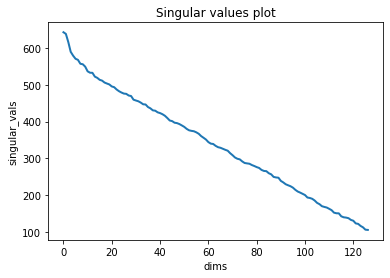

In [80]:
### plot the singular values to estimate the dimensions
plt.figure()
plt.title('Singular values plot')
plt.plot(singular_vals.squeeze(), linewidth=2)
plt.xlabel('dims')
plt.ylabel('singular_vals')
plt.show()

In [ ]:
%%time
reducer_umap = umap.UMAP()
latents_mapping = reducer_umap.fit(latents_std)

In [ ]:
umap.plot.points(latents_mapping)